# Hamiltonian


In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
import time

from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import random_state

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

In [7]:
def hamiltonian(t):
    circ = QuantumCircuit(2,2)
    circ.h(range(2))
    circ.cx(0,1)
    circ.rz(pi*t, 1)
    circ.cx(0,1)
    circ.h(range(2))
    circ.measure(range(2), range(2))
    return circ

In [11]:
circ = hamiltonian(1)

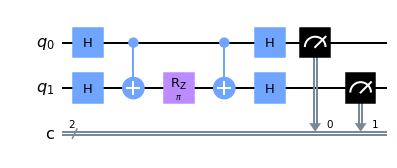

In [12]:
circ.draw();

In [13]:
getMeasure(circ, 1)

['11']

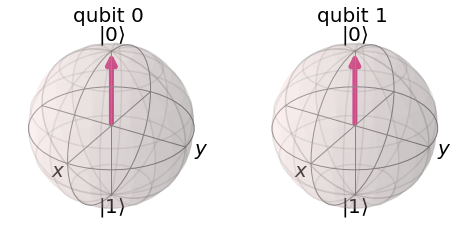

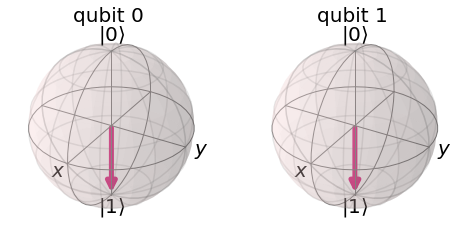

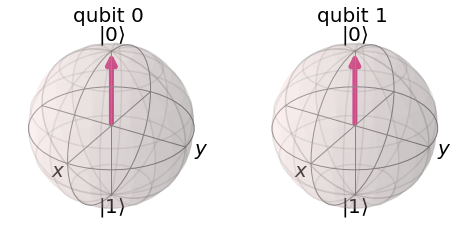

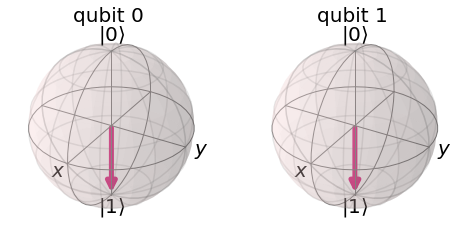

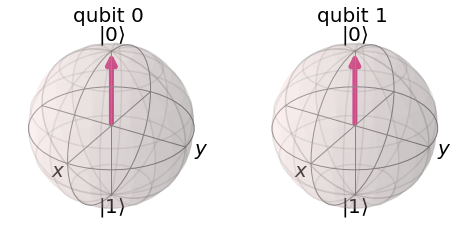

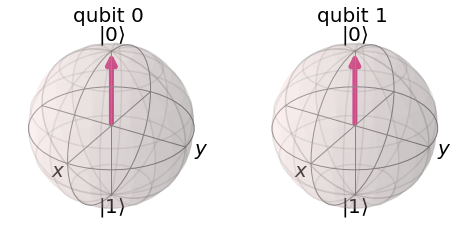

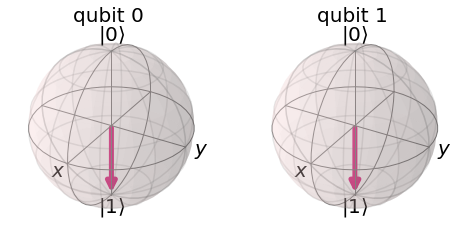

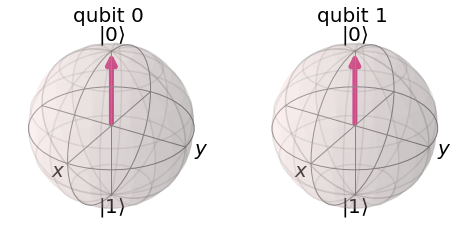

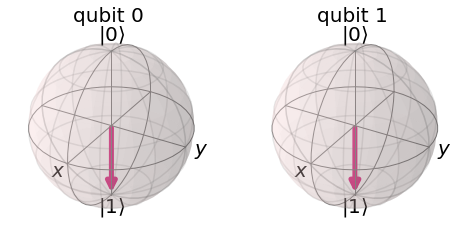

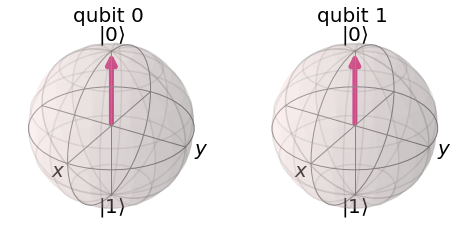

In [21]:
for t in range(0, 5):
    circ = hamiltonian(t)
    display(getBloch(circ))